# 챗봇에 넣을 결과 만들기

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

from bs4 import BeautifulSoup
import requests

from selenium import webdriver
import os 
import re
pd.set_option('display.max.colwidth', 70)

## 뉴스: 삼성전자 무슨일 있어?

### 크롤링

In [16]:
bgn_date1 = '2022.03.01'
bgn_date2 = '20220301'
end_date1 = '2022.03.30'
end_date2 = '20220330'
page = 1
corp = '삼성전자'


print('회사이름 :', corp)
title_lst = []
summary_lst = []
path_lst = []
date_lst = []

for pg in range(1,page+1):

    page_num = pg *10 - 9

    url = f'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={corp}&sort=0&photo=0&field=0&pd=3&ds={bgn_date1}&de={end_date1}&cluster_rank=24&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from{bgn_date2}to{end_date2},a:all&start={page_num}'
    res = requests.get(url)
    soup = BeautifulSoup(res.text , 'html.parser')
    lis = soup.select('#main_pack > section > div > div.group_news > ul>li')

    for li in lis:
        #제목
        title = li.select('div.news_wrap.api_ani_send > div > a')[0].text

        title_lst.append(title)

        #요약
        summary = li.select('div.news_dsc > div > a')[0].text
        summary_lst.append(summary)
        
        # url
        url_path = li.select('div.news_wrap.api_ani_send > div > a')[0]['href']
        path_lst.append(url_path)

        #날짜

        if len(li.select('div.news_info > div.info_group > span'))==1:
            date = li.select('div.news_info > div.info_group > span')[0].text
            date_lst.append(date)
            print('날짜: ',date)


        if len(li.select('div.news_info > div.info_group > span'))==2:
            date = li.select('div.news_info > div.info_group > span')[1].text
            date_lst.append(date)
            print('날짜: ',date)

df= pd.DataFrame({'날짜': date_lst, '제목': title_lst, '요약': summary_lst, 'url':url_path})


회사이름 : 삼성전자
날짜:  2022.03.30.
날짜:  2022.03.30.
날짜:  2022.03.30.
날짜:  2022.03.30.
날짜:  2022.03.29.
날짜:  2022.03.30.
날짜:  2022.03.30.
날짜:  2022.03.30.
날짜:  2022.03.30.
날짜:  2022.03.30.


In [45]:
bgn_date = '2022.03.01'
bgn_date2 = bgn_date.replace('.','')
bgn_date2

'20220301'

### 크롤링 함수화: crawl_news()

In [ ]:
bgn_date1 = '2022.03.01'
bgn_date2 = '20220301'
end_date1 = '2022.03.30'
end_date2 = '20220330'
page = 1
corp = '삼성전자'

In [22]:
def crawl_news(corp,page=1,bgn_date='2022.03.01',end_date='2022.03.30'):
    
    bgn_date1 = bgn_date
    bgn_date2 = bgn_date.replace('.','')
    end_date1 = end_date
    end_date2 = end_date.replace('.','')
    
    title_lst = []
    summary_lst = []
    url_lst = []
    date_lst = []

    for pg in range(1,page+1):

        page_num = pg *10 - 9

        url = f'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={corp}&sort=0&photo=0&field=0&pd=3&ds={bgn_date1}&de={end_date1}&cluster_rank=24&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from{bgn_date2}to{end_date2},a:all&start={page_num}'
        res = requests.get(url)
        soup = BeautifulSoup(res.text , 'html.parser')
        lis = soup.select('#main_pack > section > div > div.group_news > ul>li')

        for li in lis:
            #제목
            title = li.select('div.news_wrap.api_ani_send > div > a')[0].text

            title_lst.append(title)

            #요약
            summary = li.select('div.news_dsc > div > a')[0].text
            summary_lst.append(summary)

            # url
            url_path = li.select('div.news_wrap.api_ani_send > div > a')[0]['href']
            url_lst.append(url_path)

            #날짜

            if len(li.select('div.news_info > div.info_group > span'))==1:
                date = li.select('div.news_info > div.info_group > span')[0].text
                date_lst.append(date)


            if len(li.select('div.news_info > div.info_group > span'))==2:
                date = li.select('div.news_info > div.info_group > span')[1].text
                date_lst.append(date)
    
    df = pd.DataFrame({'날짜':date_lst,'뉴스제목':title_lst,'url':url_lst})
    
    return df

In [52]:
df = crawl_news('삼성전자')
df

,날짜,뉴스제목,url
0,2022.03.30.,"SSD 1위 삼성전자, 2위 WD와 MOU 체결…""기술 평준화 위한 협력""",http://www.newsis.com/view/?id=NISX20220330_0001813003&cID=13001&p...
1,2022.03.30.,알아서 척척 '캄테크' 강조한 한종희…삼성 TV 신제품 공개,https://www.hankyung.com/economy/article/202203301924g
2,2022.03.30.,현대重·삼성전자 헬스케어 '맞손'..입는 의료기기 협력한다,http://news.mt.co.kr/mtview.php?no=2022033010060122966
3,2022.03.30.,"신보, 삼성전자 냉장가전 협력사에 181억원 보증지원",http://yna.kr/AKR20220330048700002?did=1195m
4,2022.03.29.,"삼성전자, 태국에 초대형 마이크로 LED ‘더 월’ 설치",https://biz.chosun.com/it-science/ict/2022/03/29/ZL3KVAX2OZBMBPWBG...
5,2022.03.30.,"[단독]검찰, 삼성웰스토리·삼성전자 본사 3일째 연달아 압수수색",https://www.seoul.co.kr/news/newsView.php?id=20220330500036&wlog_t...
6,2022.03.30.,"현대重-삼성전자, 모바일 헬스케어사업 맞손",https://www.nocutnews.co.kr/news/5731610
7,2022.03.30.,"""가전은 역시 LG?""…삼성, 숨겨놓은 신무기 공개했다",https://www.sedaily.com/NewsView/263MCPH1Y0
8,2022.03.30.,"삼성전자, 웨스턴디지털과 차세대 스토리지 분야 힘 합친다",https://www.news1.kr/articles/?4631599
9,2022.03.30.,"삼성전자 ""보는 TV에서 즐기는 TV로 진화""",https://hankookilbo.com/News/Read/A2022033014570001593?did=NA


In [53]:
df

,날짜,뉴스제목,url
0,2022.03.30.,"SSD 1위 삼성전자, 2위 WD와 MOU 체결…""기술 평준화 위한 협력""",http://www.newsis.com/view/?id=NISX20220330_0001813003&cID=13001&p...
1,2022.03.30.,알아서 척척 '캄테크' 강조한 한종희…삼성 TV 신제품 공개,https://www.hankyung.com/economy/article/202203301924g
2,2022.03.30.,현대重·삼성전자 헬스케어 '맞손'..입는 의료기기 협력한다,http://news.mt.co.kr/mtview.php?no=2022033010060122966
3,2022.03.30.,"신보, 삼성전자 냉장가전 협력사에 181억원 보증지원",http://yna.kr/AKR20220330048700002?did=1195m
4,2022.03.29.,"삼성전자, 태국에 초대형 마이크로 LED ‘더 월’ 설치",https://biz.chosun.com/it-science/ict/2022/03/29/ZL3KVAX2OZBMBPWBG...
5,2022.03.30.,"[단독]검찰, 삼성웰스토리·삼성전자 본사 3일째 연달아 압수수색",https://www.seoul.co.kr/news/newsView.php?id=20220330500036&wlog_t...
6,2022.03.30.,"현대重-삼성전자, 모바일 헬스케어사업 맞손",https://www.nocutnews.co.kr/news/5731610
7,2022.03.30.,"""가전은 역시 LG?""…삼성, 숨겨놓은 신무기 공개했다",https://www.sedaily.com/NewsView/263MCPH1Y0
8,2022.03.30.,"삼성전자, 웨스턴디지털과 차세대 스토리지 분야 힘 합친다",https://www.news1.kr/articles/?4631599
9,2022.03.30.,"삼성전자 ""보는 TV에서 즐기는 TV로 진화""",https://hankookilbo.com/News/Read/A2022033014570001593?did=NA


In [65]:
kospi_list = pd.read_csv('./data/recent_kospi_list.csv')
corp_list = kospi_list['Name']
content_lst = ['최신뉴스','최근뉴스']

In [75]:
user_input1 = input('user>')
user_words = user_input1.split()
for word in user_words:
    # 종목명을 포함한다면
    if word in corp_list.tolist():
        corp = [w for w in user_words if w in corp_list.tolist()]
        
        # 최신뉴스,최근뉴스를 포함한다면
        
        if word in content_lst:
            df = crawl_news(corp)
            news_title = df['뉴스제목'].tolist()
            chatbot_output1 = '\n'.join(news_title)
        else:
            print('최신뉴스 포함x')
            break
    else:
        print('종목명 포함x')
        break

user>삼성전자 최신뉴스 알려줘
최신뉴스 포함x


In [ ]:
corp_list

In [71]:
user_words

['삼성전자', '최신뉴스', '알려줘']

In [72]:
corp

['삼성전자']

In [73]:
content_lst

['최신뉴스', '최근뉴스']

In [93]:
user_input1 = input('user>')
user_words = user_input1.split()
for word in user_words:
    # 종목명을 포함한다면
    if word in corp_list.tolist():
        corp = [w for w in user_words if w in corp_list.tolist()]
        user_words.remove(corp[0])
        print(corp[0])
        #corp = '삼성전자'
        # 최신뉴스,최근뉴스를 포함한다면
        for word1 in user_words:
            if word1 in content_lst:
                df = crawl_news(corp)
                news_title = df['뉴스제목'].tolist()
                chatbot_output1 = '\n'.join(news_title)
                print(chatbot_output1)
                
    else:
        print('종목명 포함x')
        break

# 삼성전자 최신뉴스 알려줘

user>삼성전자 최신뉴스 알려줘
['삼성전자']
SSD 1위 삼성전자, 2위 WD와 MOU 체결…"기술 평준화 위한 협력"
한종희 삼성전자 부회장, 사용자 경험 혁신 강조…"알아서 맞추는 캄테크 필요...
현대重·삼성전자 헬스케어 '맞손'..입는 의료기기 협력한다
신보, 삼성전자 냉장가전 협력사에 181억원 보증지원
현대重-삼성전자, 모바일 헬스케어사업 맞손
[단독]검찰, 삼성웰스토리·삼성전자 본사 3일째 연달아 압수수색
삼성전자 해킹한 랩서스, 공격기법은 뭘까?…임직원 계정 악용
삼성전자, 태국에 초대형 마이크로 LED ‘더 월’ 설치
삼성전자, 웨스턴디지털과 차세대 스토리지 분야 힘 합친다
삼성전자도 뛰어든 저장장치 '존 스토리지'
종목명 포함x


In [92]:
corp[0]

'삼성전자'

In [81]:
user_words.remove('삼성전자')

In [88]:
any([True if text in con_li else False for text in user_text.split()])

True

In [86]:
any([True if text in cor_li else False for text in user_text.split()])

True

In [ ]:
if any([True if text in cor_li else False for text in user_text.split()]) and any([True if text in con_li else False for text in user_text.split()]):
    print(True)
else:
    print(False)

## 삼성전자 뭐랑 관련있어?(키워드 보여주기)

In [95]:
df_n = pd.read_csv('./data/개별기업뉴스_자연어처리/AJ네트웍스.csv',index_col=0)
df_n.index = pd.to_datetime(df_n.index)
df_n['뉴스'] = df_n['뉴스'].apply(lambda x : eval(x))
df_n.head()

,뉴스제목,뉴스
2016-01-01,NaN,[]
2016-01-02,NaN,[]
2016-01-03,NaN,[]
2016-01-04,"AJ네트웍스, SKB 등에업고 '고리사채급 위약금 폭탄'","[AJ네트웍스, 등에업, 고리사채급, 위약금, 폭탄]"
2016-01-05,"AJ네트웍스, 스마트폰, 태블릿PC 렌탈사업 시작","[AJ네트웍스, 스마트폰, 태블릿PC, 렌탈사업, 시작]"


In [102]:
df_stw = pd.read_csv('./data/뉴스불용어2.csv',index_col=1)
df_stw.head()

,불용어
NaN,주식그래프
NaN,주가차트
NaN,작년
NaN,연간
NaN,연결


In [105]:
df_stw = pd.read_csv('./data/뉴스불용어2.csv',index_col=1)
stw_lst = df_stw['불용어'].tolist()
kw_dict = dict()

# 2016-01-01 ~ 2016-02-01 가정
bgn_date = '2016-01-01'
end_date = '2016-02-01'

token_lst = df_n['뉴스'].loc[bgn_date:end_date]
token_lst = [w for w in token_lst if w not in stw_lst]
# toekn_lst.remove(corp_name)

for tokens in token_lst:

    for word in tokens:
        if not word in kw_dict.keys():
            kw_dict[word] = 1
        else:
            kw_dict[word] += 1

kw_dict = dict(sorted(kw_dict.items(), key = lambda x: x[1]))

kw_dict

{'등에업': 1,
 '고리사채급': 1,
 '위약금': 1,
 '폭탄': 1,
 '렌탈사업': 1,
 '사업': 1,
 '파렛트및': 1,
 '고소장비': 1,
 '신규': 1,
 '서비스': 1,
 '브랜드': 1,
 '런칭': 1,
 '대상AJ네트웍스': 1,
 '우량채': 1,
 '발행': 1,
 '성공': 1,
 '스마트폰': 2,
 '태블릿PC': 2,
 '시작': 2,
 '렌탈': 2,
 'AJ네트웍스': 4}

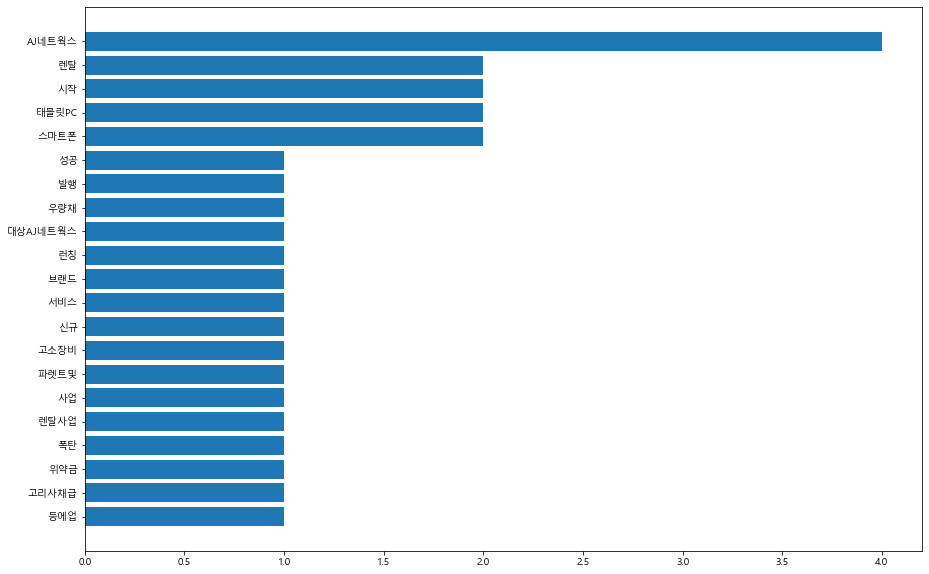

In [99]:
plt.figure(figsize=(15,10))
keyword_list = list(kw_dict.keys())
keyword_count = list(kw_dict.values())
plt.barh(keyword_list,keyword_count)
plt.show()

In [126]:
df_stw = pd.read_csv('./data/뉴스불용어2.csv',index_col=1)
stw_lst = df_stw['불용어'].tolist()
stw_lst

['주식그래프',
 '주가차트',
 '작년',
 '연간',
 '연결',
 '주식주가',
 '투자주식',
 '일마감주가정보',
 '실시간',
 '금일증시',
 '기준일마감증시',
 '증권주식',
 '보합세천일',
 '마감증시',
 '실시간증시',
 '오늘주식',
 '주식정보',
 '증시동향월',
 '년새',
 '관련',
 '동반',
 '최대',
 '비교해서',
 '현재주가',
 '집중',
 '전일',
 '장중',
 '오늘주식장',
 '오늘증권시세',
 '주식증권',
 '주요',
 '일마감증시',
 '일주가마감정보',
 '주식인사이드',
 '주요종목',
 '전년동기',
 '목표주가',
 '매수',
 '주식',
 '체결',
 '돌파',
 '비중',
 '주식종목',
 '증시정보',
 '지난해',
 '주식종목시',
 '주식현황',
 '유가증권시장',
 '변동해',
 '주당',
 '최고',
 '하반기',
 '상반기',
 '거래비중',
 '분기',
 '지속',
 '시장',
 '적정',
 '부문',
 '기업',
 '상회',
 '주식종목검색',
 '주식실시간',
 '오늘주식시장',
 '주가증권투자정보',
 '주체별',
 '종목관련',
 '동향정보',
 '주가오늘시',
 '전일대비',
 '억전년비',
 '증시동향',
 '증권정보',
 '동시',
 '증권',
 '증권그래프',
 '증가',
 '주가및',
 '스타주식인사이드',
 '적정수준',
 '변동',
 '주차',
 '천일',
 '오늘',
 '가격',
 '주가증권그래프',
 '주간',
 '리포트',
 '오늘거래',
 '상승폭',
 '정보',
 '연속',
 '발동',
 '억원',
 '그래프',
 '증권시세',
 '주가정보',
 '확대',
 '증권투자정보',
 '거래',
 '오전',
 '이평',
 '순매수',
 '주가',
 '원월',
 '기준',
 '주식시황',
 '오후',
 '이상',
 '거래량',
 '대비',
 '마감',
 '현재',
 '시황',
 '상위',
 '종목',
 '업종',
 '한경로보뉴스',
 '결정',
 '내용',


### 키워드 함수: kw_news()

In [191]:
def kw_news(corp,bgn_date='2022-03-01',end_date='2022-03-30' ):
    df_n = pd.read_csv(f'./data/개별기업뉴스_자연어처리/{corp}.csv',index_col=0)
    df_n.index = pd.to_datetime(df_n.index)
    df_n['뉴스'] = df_n['뉴스'].apply(lambda x : eval(x))
    df_stw = pd.read_csv('./data/뉴스불용어2.csv',index_col=1)
    stw_lst = df_stw['불용어'].tolist()
    kw_dict = dict()

    token_lst = df_n['뉴스'].loc[bgn_date:end_date]
            
    for tokens in token_lst:
        for word in tokens:
                
            if not word in kw_dict.keys():
                kw_dict[word] = 1
            else:
                kw_dict[word] += 1

    kw_dict = dict(sorted(kw_dict.items(), key = lambda x: x[1],reverse=True))
    keys = pd.Series(kw_dict.keys()).tolist()
    for key in keys:
        if (key in stw_lst) | (key == corp):
            del kw_dict[key]
            
    return kw_dict

In [278]:
ss_dict = kw_news('삼성전자')
# ss_dict

### 크롤링 함수사용: 전처리함수+ kw_crawl_news()

In [38]:
df_n = crawl_news('삼성전자')
df_n.head()

,날짜,뉴스제목,url
0,2022.03.30.,"SSD 1위 삼성전자, 2위 WD와 MOU 체결…""기술 평준화 위한 협력""",http://www.newsis.com/view/?id=NISX20220330_0001813003&cID=13001&p...
1,2022.03.30.,알아서 척척 '캄테크' 강조한 한종희…삼성 TV 신제품 공개,https://www.hankyung.com/economy/article/202203301924g
2,2022.03.30.,현대重·삼성전자 헬스케어 '맞손'..입는 의료기기 협력한다,http://news.mt.co.kr/mtview.php?no=2022033010060122966
3,2022.03.30.,"신보, 삼성전자 냉장가전 협력사에 181억원 보증지원",http://yna.kr/AKR20220330048700002?did=1195m
4,2022.03.29.,"삼성전자, 태국에 초대형 마이크로 LED ‘더 월’ 설치",https://biz.chosun.com/it-science/ict/2022/03/29/ZL3KVAX2OZBMBPWBG...


In [33]:
from konlpy.tag import Hannanum
# 한글,영어만 남기기
def clean_text(docs):
    docs = re.sub('[^가-힣A-Za-z ]', '', str(docs))
    docs = re.sub('\s+', ' ', docs)
    docs = '' if docs== ' ' else docs
    return docs

# 명사 추출
def han_noun(docs):
    han = Hannanum()
    docs = han.nouns(docs)
    return docs

# 불용어 제거+ 한글자 이상만 남기기
stw_list = pd.read_csv('./data/stopwords-ko.txt')
def remove_stwords(docs):
    docs = [w for w in docs if not w in stw_list]
    docs = '' if docs== ' ' else docs
    docs = [w for w in docs if len(w)>1]
    return docs

In [40]:
df_n['뉴스'] = df_n['뉴스제목'].apply(clean_text)
df_n['뉴스'] = df_n['뉴스'].apply(han_noun)
df_n['뉴스'] =  df_n['뉴스'].apply(remove_stwords)
df_n

,날짜,뉴스제목,url,뉴스
0,2022.03.30.,"SSD 1위 삼성전자, 2위 WD와 MOU 체결…""기술 평준화 위한 협력""",http://www.newsis.com/view/?id=NISX20220330_0001813003&cID=13001&p...,"[삼성전자, 체결기술, 평준화, 협력]"
1,2022.03.30.,알아서 척척 '캄테크' 강조한 한종희…삼성 TV 신제품 공개,https://www.hankyung.com/economy/article/202203301924g,"[캄테크, 강조, 한종희삼성, 신제품, 공개]"
2,2022.03.30.,현대重·삼성전자 헬스케어 '맞손'..입는 의료기기 협력한다,http://news.mt.co.kr/mtview.php?no=2022033010060122966,"[현대삼성전자, 헬스케어, 맞손입, 의료기, 협력]"
3,2022.03.30.,"신보, 삼성전자 냉장가전 협력사에 181억원 보증지원",http://yna.kr/AKR20220330048700002?did=1195m,"[삼성전자, 냉장가전, 협력사, 억원, 보증지원]"
4,2022.03.29.,"삼성전자, 태국에 초대형 마이크로 LED ‘더 월’ 설치",https://biz.chosun.com/it-science/ict/2022/03/29/ZL3KVAX2OZBMBPWBG...,"[삼성전자, 태국, 초대형, 마이크, 설치]"
5,2022.03.30.,"[단독]검찰, 삼성웰스토리·삼성전자 본사 3일째 연달아 압수수색",https://www.seoul.co.kr/news/newsView.php?id=20220330500036&wlog_t...,"[단독검찰, 삼성웰스토리삼성전자, 본사, 압수수색]"
6,2022.03.30.,"현대重-삼성전자, 모바일 헬스케어사업 맞손",https://www.nocutnews.co.kr/news/5731610,"[현대삼성전자, 모바, 헬스케어사업, 맞손]"
7,2022.03.30.,"""가전은 역시 LG?""…삼성, 숨겨놓은 신무기 공개했다",https://www.sedaily.com/NewsView/263MCPH1Y0,"[가전, 삼성, 신무기, 공개]"
8,2022.03.30.,"삼성전자, 웨스턴디지털과 차세대 스토리지 분야 힘 합친다",https://www.news1.kr/articles/?4631599,"[삼성전자, 웨스턴디지털, 차세대, 스토리, 분야]"
9,2022.03.30.,"삼성전자 ""보는 TV에서 즐기는 TV로 진화""",https://hankookilbo.com/News/Read/A2022033014570001593?did=NA,"[삼성전자, 진화]"


In [45]:
def kw_crawl_news(corp,bgn_date='2022-03-01',end_date='2022-03-30'):
    df_n = crawl_news(corp,10)
    df_n = df_n.set_index('날짜')
    df_n.index = pd.to_datetime(df_n.index)
    df_n['뉴스'] = df_n['뉴스제목'].apply(clean_text)
    df_n['뉴스'] = df_n['뉴스'].apply(han_noun)
    df_n['뉴스'] =  df_n['뉴스'].apply(remove_stwords)
    df_stw = pd.read_csv('./data/뉴스불용어2.csv',index_col=1)
    stw_lst = df_stw['불용어'].tolist()
    kw_dict = dict()

    token_lst = df_n['뉴스'].loc[bgn_date:end_date]
            
    for tokens in token_lst:
        for word in tokens:
                
            if not word in kw_dict.keys():
                kw_dict[word] = 1
            else:
                kw_dict[word] += 1

    kw_dict = dict(sorted(kw_dict.items(), key = lambda x: x[1],reverse=True))
    keys = pd.Series(kw_dict.keys()).tolist()
    for key in keys:
        if (key in stw_lst) | (key == corp):
            del kw_dict[key]
            
    return kw_dict

In [48]:
%%time
ss_dict1 = kw_crawl_news('삼성전자')
ss_dict1

Wall time: 51.8 s


C:\Users\bitcamp\AppData\Local\Temp/ipykernel_18084/1993093450.py:12: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  token_lst = df_n['뉴스'].loc[bgn_date:end_date]


{'압수수색': 20,
 '검찰': 20,
 '삼성': 16,
 '스토리': 16,
 '협력': 13,
 '의혹': 13,
 '부당지원': 12,
 '삼성전자웰스토리': 12,
 '차세대': 11,
 '분야': 9,
 '기술': 9,
 '웨스턴디지털': 8,
 '지원': 7,
 '홍라희': 5,
 '웰스토리': 5,
 '이틀째': 5,
 '삼성전자웨스턴디지털': 5,
 '헬스케어': 4,
 '본사': 4,
 '모바': 4,
 '맞손': 4,
 '협력기업': 4,
 '보증': 4,
 '캄테크': 3,
 '태국': 3,
 '마이크': 3,
 '설치': 3,
 '조원': 3,
 '삼성전자삼성웰스토리': 3,
 '노조': 3,
 '매출': 3,
 '인텔': 3,
 '반도체': 3,
 '수준': 3,
 '프로젝트': 3,
 '강조': 2,
 '공개': 2,
 '현대삼성전자': 2,
 '초대형': 2,
 '전략': 2,
 '언박스': 2,
 '부회장': 2,
 '사용자': 2,
 '승계': 2,
 '방콕': 2,
 '동등': 2,
 '제품': 2,
 '삼성SK하이닉스': 2,
 '역대': 2,
 '실적': 2,
 '메디플러스솔루션': 2,
 '정부': 2,
 '표준화': 2,
 '공동': 2,
 '스마트': 2,
 '모니터': 2,
 '한종희': 2,
 '수원': 2,
 '정권': 2,
 '교체': 2,
 '삼성웰스토리': 2,
 '고객': 2,
 '처분상속세': 2,
 '전망': 2,
 '체결기술': 1,
 '평준화': 1,
 '한종희삼성': 1,
 '신제품': 1,
 '맞손입': 1,
 '의료기': 1,
 '냉장가전': 1,
 '협력사': 1,
 '보증지원': 1,
 '단독검찰': 1,
 '헬스케어사업': 1,
 '가전': 1,
 '신무기': 1,
 '진화': 1,
 '저장장치': 1,
 '빅딜': 1,
 '임박협상': 1,
 '진행중': 1,
 '완제품': 1,
 '상속세': 1,
 '여사': 1,
 '직원': 1,
 '혐의': 1,
 '이슈체크': 1,
 '반도체

In [62]:
keyword_list = list(ss_dict1.keys())[:10]
keyword_list

['압수수색', '검찰', '삼성', '스토리', '협력', '의혹', '부당지원', '삼성전자웰스토리', '차세대', '분야']

### 키워드 그래프 함수: show_kw()

In [47]:
def show_kw(kw_dict,num=10):
    plt.figure(figsize=(15,10))
    keyword_list = list(kw_dict.keys())[:num]
    keyword_count = list(kw_dict.values())[:num]
    plt.barh(keyword_list,keyword_count)
    plt.gca().invert_yaxis()
    plt.show()

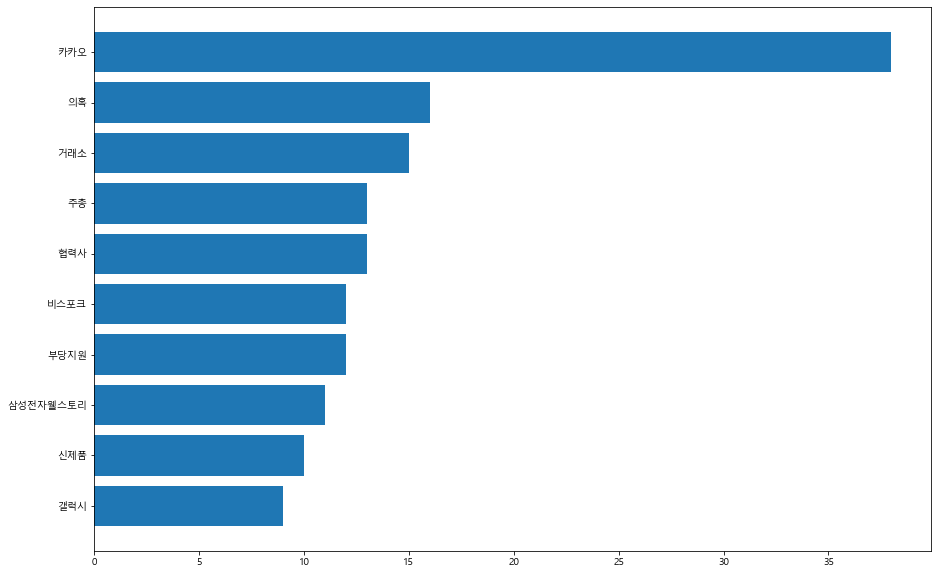

In [219]:
show_kw(ss_dict)

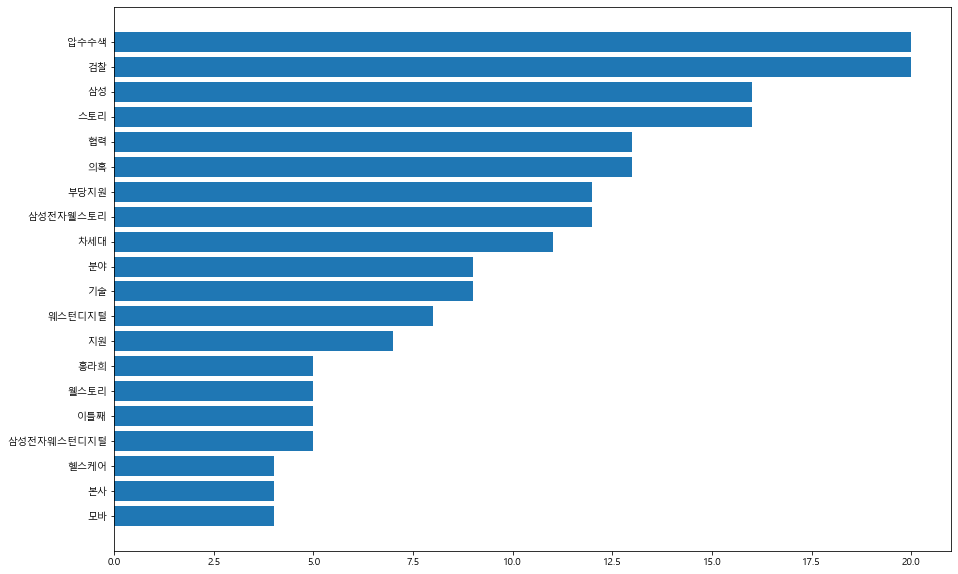

In [50]:
show_kw(ss_dict1,20)

## 삼성전자 호재있어??: 

### call_model(), text_data(), clsfy_news()

In [51]:
import tensorflow_addons as tfa
import tensorflow as tf
from tqdm import tqdm
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, \
                            roc_auc_score, confusion_matrix, classification_report, \
                            matthews_corrcoef, cohen_kappa_score, log_loss

In [8]:
# 최고 성능의 모델 불러오기
def call_model():
    BEST_MODEL_NAME = './data/model/best_model.h5'
    sentiment_model_best = tf.keras.models.load_model(BEST_MODEL_NAME,
                                                      custom_objects={'TFBertForSequenceClassification': TFBertForSequenceClassification})
    MODEL_NAME = "klue/bert-base"
    model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3, from_pt=True)
    tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
    return sentiment_model_best, tokenizer

In [9]:
def text_data(X_data,tokenizer,MAX_SEQ_LEN=64):
    # BERT 입력으로 들어가는 token, mask, segment, target 저장용 리스트
    tokens, masks, segments, targets = [], [], [], []
    
    for X in tqdm(X_data):
        # token: 입력 문장 토큰화
        token = tokenizer.encode(X, truncation = True, padding = 'max_length', max_length = MAX_SEQ_LEN)
        
        # Mask: 토큰화한 문장 내 패딩이 아닌 경우 1, 패딩인 경우 0으로 초기화
        num_zeros = token.count(0)
        mask = [1] * (MAX_SEQ_LEN - num_zeros) + [0] * num_zeros
        
        # segment: 문장 전후관계 구분: 오직 한 문장이므로 모두 0으로 초기화
        segment = [0]*MAX_SEQ_LEN

        tokens.append(token)
        masks.append(mask)
        segments.append(segment)


    # numpy array로 저장
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)


    return [tokens, masks, segments]

In [12]:
def clsfy_news(corp,senti_model,tokenizer,senti=1,num=10): #1 2 0 긍정 부정 중립
    df_n = pd.read_csv(f'./data/개별기업뉴스_전처리/{corp}.csv',index_col=0)
    df_n = df_n.set_index('날짜')
    df_n.index = pd.DatetimeIndex(df_n.index)
    news_data = df_n['뉴스제목']
    news_x = text_data(news_data,tokenizer)
    predicted_value = senti_model.predict(news_x)
    predicted_label = np.argmax(predicted_value, axis = 1)
    idx = np.where(predicted_label== senti)[::-1]
    df_senti = df_n.iloc[idx][:'2022-03-30'].sort_index(ascending=False)
    return df_senti[:num]  

In [13]:
model, tokenizer = call_model()
clsfy_news('삼성전자',senti_model=model,tokenizer=tokenizer)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|█████████████████████████████████████████████████████████████

,뉴스제목,뉴스요약
날짜,,
2022-05-31,"삼성전자, 당분간 박스권 움직임에서 횡보",삼성전자가 대규모 투자계획에도 불구하고 각종 악재가 연이어 불거지며 주가는 6만원대에서 벗어나지 못하고 있다. 여기에 ...
2022-05-31,"중국언론 ""삼성전자 5대 매출처, 제조와 공급 측면의 장점 모두 과시""",삼성전자의 5대 매출처 분포가 부품 제조능력과 제품 공급망 관리 능력 측면의 경쟁력을 모두 보여주고 있다는 중국 IT전...
2022-05-31,코스피 1%대 상승…外人·기관 '쌍끌이' 삼성전자 6만7700원·네이버 4% 올라,"삼성전자는 전날보다 1.80% 오른 6만7700원에 마감했고, SK하이닉스도 0.94% 상승한 10만7000원에 장을 ..."
2022-05-31,"삼성전자·LG, 자사주 매입으로 주주가치↑...“주가 방어 전력”",삼성전자와 LG 등 주요 상장사들이 자사주 매입으로 주주가치 제고와 함께 주가 하락 방어에 나서고 있다. 약세장에서도 ...
2022-05-31,에릭슨엘지가 이음5G 시장서 노키아·삼성전자와 차별화하는 법,화웨이·노키아·삼성전자 등과 통신장비 시장에서 경쟁을 펼치고 있는 에릭슨엘지는 30일 서울 중구 더플라자에서 'Imag...
2022-05-31,"삼성전자, 새 AP로 자존심 회복 나선다…'엑시노스' 신제품 개발",사진=삼성전자 제공 삼성전자가 모바일용 애플리케이션프로세서(AP) '엑시노스2200'의 후속 제품을 개발하고 있는 것...
2022-05-31,삼성전자 LG엔솔 SK하이닉스 훨훨... 스푸트니크V주 연내 승인 가능성에 주목,대장주 삼성전자는 전 거래일 대비 1200원(1.80%) 오른 6만7700원에 거래를 마쳤다. LG에너지솔루션(2.09...
2022-05-31,"애플 아이폰14에 LPDDR5 D램 최초 적용, 삼성전자 SK하이닉스 수혜",삼성전자와 SK하이닉스 등 애플의 메모리반도체 협력사에서 기존 D램보다 단가가 높은 LPDDR5 D램 공급을 담당하며 ...
2022-05-31,"[증시 돋보기] 외국인 2달 만에 3일 연속 순매수, 삼성전자 대거 사들여",외국인투자자는 이날 삼성전자와 LG에너지솔루션 등 시가총액 상위 종목을 크게 순매수했다. 한국거래소 정보데이터시스템에 ...


In [ ]:
BEST_MODEL_NAME = './data/model/best_model.h5'
sentiment_model_best = tf.keras.models.load_model(BEST_MODEL_NAME,
                                                      custom_objects={'TFBertForSequenceClassification': TFBertForSequenceClassification})

In [20]:
df_n = pd.read_csv(f'./data/개별기업뉴스_전처리/삼성전자.csv',index_col=0)
df_n = df_n.set_index('날짜')
df_n.index = pd.DatetimeIndex(df_n.index)
news_data = df_n['뉴스제목']
news_x = text_data(news_data,tokenizer)
predicted_value = sentiment_model_best.predict(news_x)
predicted_label = np.argmax(predicted_value, axis = 1)
idx = np.where(predicted_label== 1)
df_senti = df_n.iloc[idx][:'2022-03-30'].sort_index(ascending=False)
df_senti

100%|████████████████████████████████████████████████████████████████████████████| 9676/9676 [00:01<00:00, 5396.16it/s]


,뉴스제목,뉴스요약
날짜,,
2022-03-30,"삼성전자, WD와 차세대 스토리지 기술 협력",삼성전자가 웨스턴디지털(WD)과 손잡고 차세대 스토리지 기술 표준화와 제품 개발에 나선다. 삼성전자는 WD와 '존 스토...
2022-03-30,"반도체 업황 개선…""6월부터 삼성전자의 시간""",메모리 반도체 업황의 나침반인 미국 마이크론이 호실적과 장밋빛 전망을 발표했지만 삼성전자(005930)의 주가가 여전히...
2022-03-30,"삼성전자, 웨스턴디지털과 차세대 스토리지 분야 기술 협력",삼성전자가 스토리지 전문 기업인 미국 웨스턴디지털과 존 스토리지 기술 협력을 위한 양해각서(MOU)를 체결했다고 30일...
2022-03-30,"한종희 부회장 ""삼성전자만의 캄테크로 삶의질 높일 것""",한종희 삼성전자 DX부문장(부회장)이 고객의 다양한 요구와 삶의 질을 실질적으로 향상시키는 '캄 테크'의 중요성을 강조...
2022-03-30,삼성전자·메디플러스 “웨어러블 헬스케어 협력”,현대중공업그룹의 모바일 헬스케어 솔루션 기업 메디플러스솔루션이 삼성전자와 웨어러블 기기 기반의 헬스케어 사업을 확대한다...
...,...,...
2016-01-21,"삼성전자 S 아카데미, 스낵클립 영상 300만뷰 돌파",삼성 S아카데미 스낵클립 영상 스틸컷 (사진제공: 삼성전자) 서울--(뉴스와이어) 삼성전자가 ‘S 아카데미’ 캠페인의 ...
2016-01-17,삼성전자 S 아카데미 행사 10일만에 ‘노트북 9’ 시리즈 판매량 1만대 돌파,삼성전자가 지난 6일 시작된 아카데미 행사 열흘 만에 노트북 9 시리즈 국내 판매 1만대를 돌파했다. 삼성전자는 뛰어난...
2016-01-13,"삼성전자 대형 TV, 큰 폭의 판매 성장을 기록",삼성 SUHD TV 65JS9500 (사진제공: 삼성전자) 서울--(뉴스와이어) 삼성전자 대형 TV가 지난해 국내에서 ...


### 크롤링 데이터 사용: clsfy_crawl_news()

In [53]:
def clsfy_news(corp,senti_model,tokenizer,senti=1,page=10,num=10): #1 2 0 긍정 부정 중립
    df_n = crawl_news(corp,page)
    df_n = df_n.set_index('날짜')
    df_n.index = pd.to_datetime(df_n.index)
    news_data = df_n['뉴스제목']
    news_x = text_data(news_data,tokenizer)
    predicted_value = senti_model.predict(news_x)
    predicted_label = np.argmax(predicted_value, axis = 1)
    idx = np.where(predicted_label== senti)[::-1]
    df_senti = df_n.iloc[idx][:'2022-03-30'].sort_index(ascending=False)
    return df_senti[:num]  

In [54]:
model, tokenizer = call_model()
# 긍정뉴스
clsfy_news('삼성전자',senti_model=model,tokenizer=tokenizer)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|█████████████████████████████████████████████████████████████

,뉴스제목,url
날짜,,
2022-03-30,"SSD 1위 삼성전자, 2위 WD와 MOU 체결…""기술 평준화 위한 협력""",http://www.newsis.com/view/?id=NISX20220330_0001813003&cID=13001&p...
2022-03-30,현대重·삼성전자 헬스케어 '맞손'..입는 의료기기 협력한다,http://news.mt.co.kr/mtview.php?no=2022033010060122966
2022-03-30,"삼성전자, 웨스턴디지털과 차세대 스토리지 분야 기술 협력 MOU 체결",https://www.ngetnews.com/news/articleView.html?idxno=407218
2022-03-30,"삼성전자, 美 웨스턴디지털과 차세대 스토리지 분야 기술 협력",http://www.dizzotv.com/site/data/html_dir/2022/03/30/2022033080017...
2022-03-30,"삼성전자, 웨스턴디지털과 차세대 스토리지 분야 기술 협력 추진",http://www.bizwnews.com/news/articleView.html?idxno=34376
2022-03-30,"한종희 부회장 ""삼성 혁신은 고객 경험에서 출발…삶의 질 향상시켜 나갈 것""",http://www.dizzotv.com/site/data/html_dir/2022/03/30/2022033080194...
2022-03-30,"삼성전자-웨스턴디지털, '존 스토리지' 분야 기술 협력",http://www.newscape.co.kr/news/articleView.html?idxno=81464
2022-03-30,"삼성전자, 美 웨스턴디지털과 ‘존 스토리지’ 기술 표준화 협력",http://www.fntimes.com/html/view.php?ud=202203301033557482645ffc97...
2022-03-30,"삼성전자, 웨스턴디지털과 '맞손'… 차세대 스토리지 분야 기술 협력",http://www.getnews.co.kr/news/articleView.html?idxno=578460


In [56]:
# 부정뉴스
clsfy_news('삼성전자',senti_model=model,tokenizer=tokenizer,senti=2)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 5569.24it/s]


,뉴스제목,url
날짜,,
2022-03-30,[이슈체크] 반도체주 호재만발인데…삼성전자 부진한 이유,https://biz.sbs.co.kr/article_hub/20000056437?division=NAVER
2022-03-30,'춘래불사춘' 삼성...한꺼번에 몰려온 '3중고 먹구름',https://www.ytn.co.kr/_ln/0102_202203300510101326
2022-03-30,"삼성, GOS·노조 이어 '사법 리스크'까지…'300조 매출' 발목 잡히나",http://www.newsis.com/view/?id=NISX20220330_0001813774&cID=13001&p...
2022-03-30,"""러 우크라 침공에…"" 삼성·LG 등 TV판매 460만대 감소 전망",http://daily.hankooki.com/news/articleView.html?idxno=806278
